In [1]:
from keras.models import load_model

2024-04-09 17:08:16.620467: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-09 17:08:16.793101: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 17:08:16.793153: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 17:08:16.793165: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-09 17:08:16.875627: I tensorflow/core/platform/cpu_feature_g

In [2]:
model = load_model('cats_and_dogs_small_2.h5')

2024-04-09 17:08:23.452846: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-09 17:08:23.611894: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-09 17:08:23.612253: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

In [4]:
img_path = '/home/shidaohg/WorkPlace/data/cats_and_dogs_small/test/cats/1700.jpg'

In [20]:
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


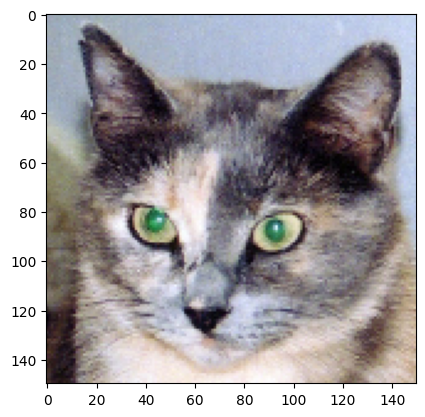

In [21]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [9]:
img_tensor

array([[[[0.627451  , 0.69411767, 0.7254902 ],
         [0.6117647 , 0.6627451 , 0.69803923],
         [0.61960787, 0.6784314 , 0.7058824 ],
         ...,
         [0.77254903, 0.827451  , 0.92941177],
         [0.7882353 , 0.84313726, 0.94509804],
         [0.77254903, 0.827451  , 0.92941177]],

        [[0.6313726 , 0.6666667 , 0.73333335],
         [0.6156863 , 0.6431373 , 0.7137255 ],
         [0.6156863 , 0.6431373 , 0.7058824 ],
         ...,
         [0.78039217, 0.84313726, 0.9411765 ],
         [0.7882353 , 0.84313726, 0.94509804],
         [0.8117647 , 0.8666667 , 0.96862745]],

        [[0.61960787, 0.6627451 , 0.73333335],
         [0.62352943, 0.6509804 , 0.72156864],
         [0.6431373 , 0.67058825, 0.7411765 ],
         ...,
         [0.78431374, 0.85490197, 0.9411765 ],
         [0.77254903, 0.8352941 , 0.9372549 ],
         [0.7647059 , 0.827451  , 0.92941177]],

        ...,

        [[0.27450982, 0.20784314, 0.18039216],
         [0.22745098, 0.18039216, 0.18039216]

In [22]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [23]:
activations = activation_model.predict(img_tensor)

2024-04-09 20:19:37.258992: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-04-09 20:19:37.470338: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 1s 904ms/step


2024-04-09 20:19:37.843344: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [28]:
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 148, 148, 32)

/tmp/ipykernel_10287/2977919705.py:18: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
/tmp/ipykernel_10287/2977919705.py:21: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype('uint8')


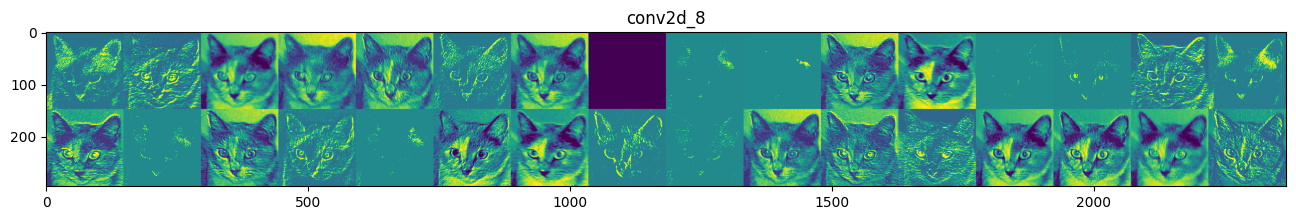

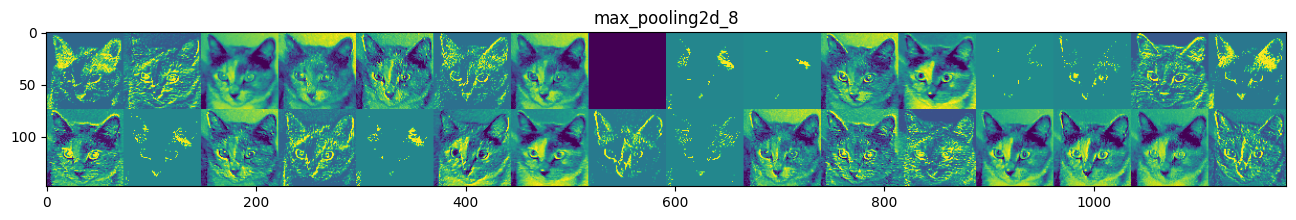

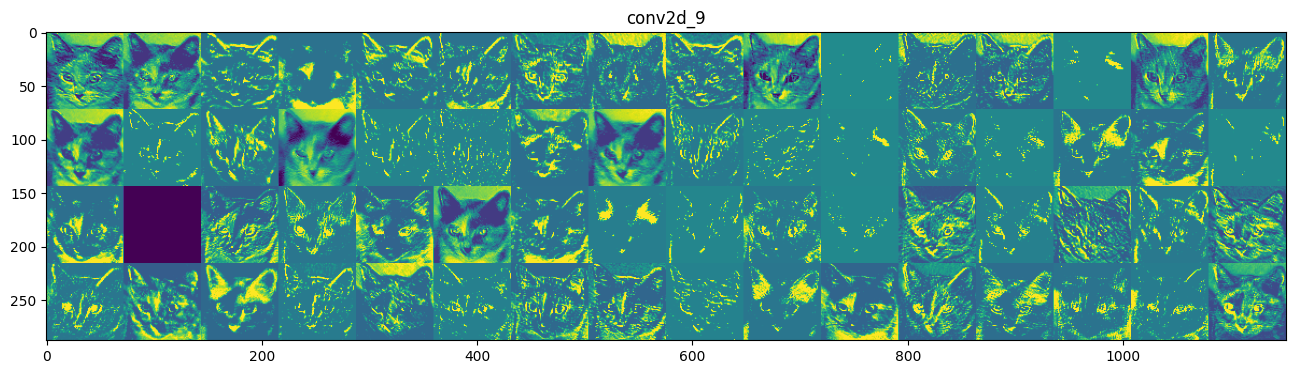

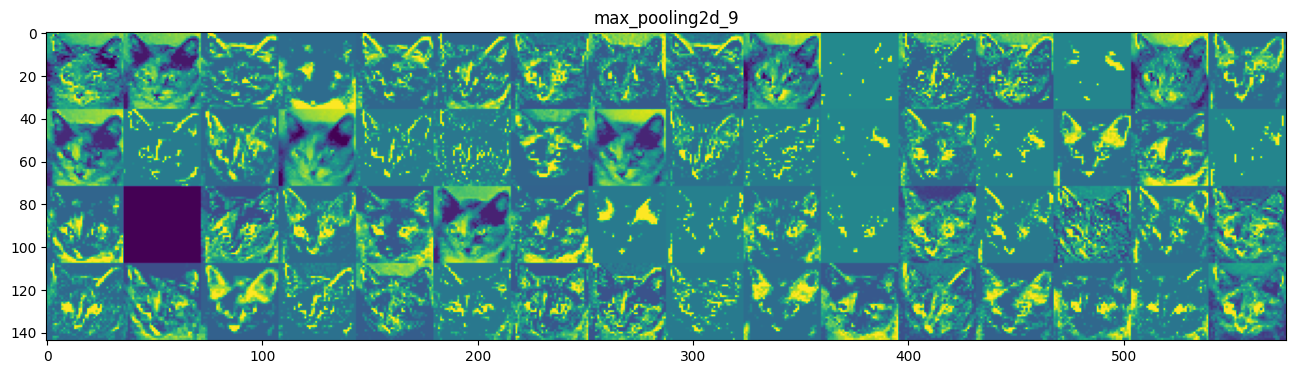

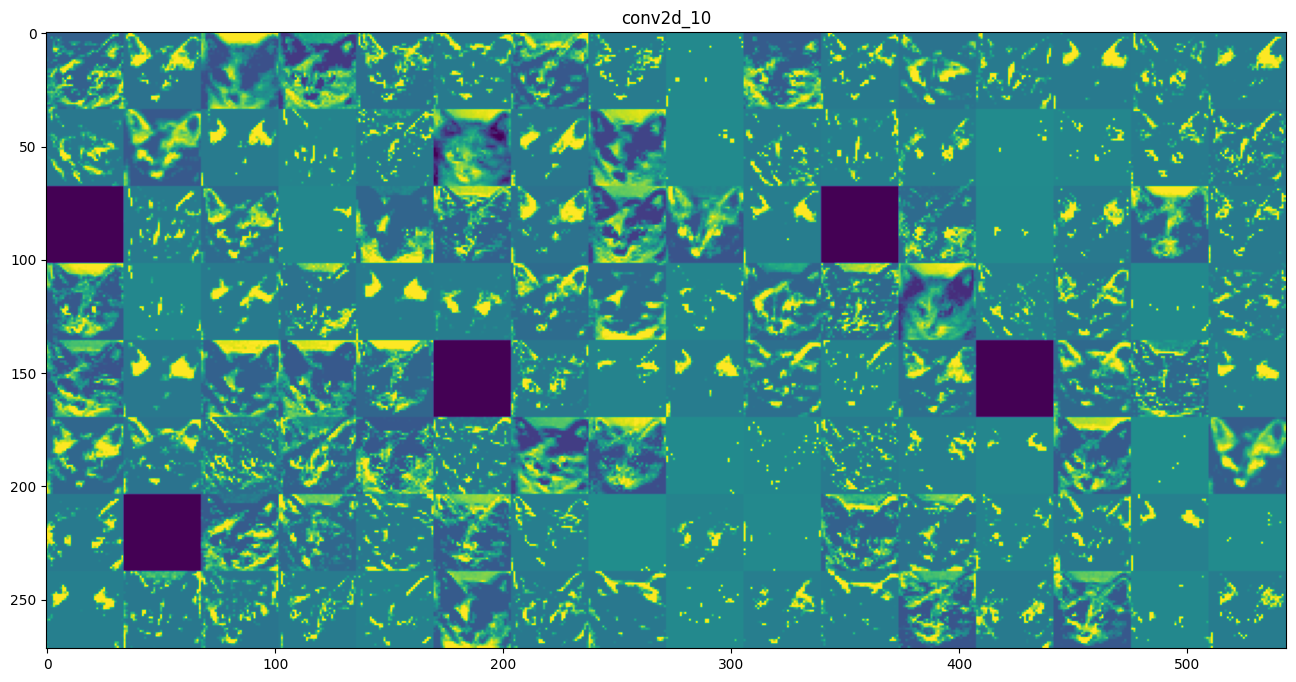

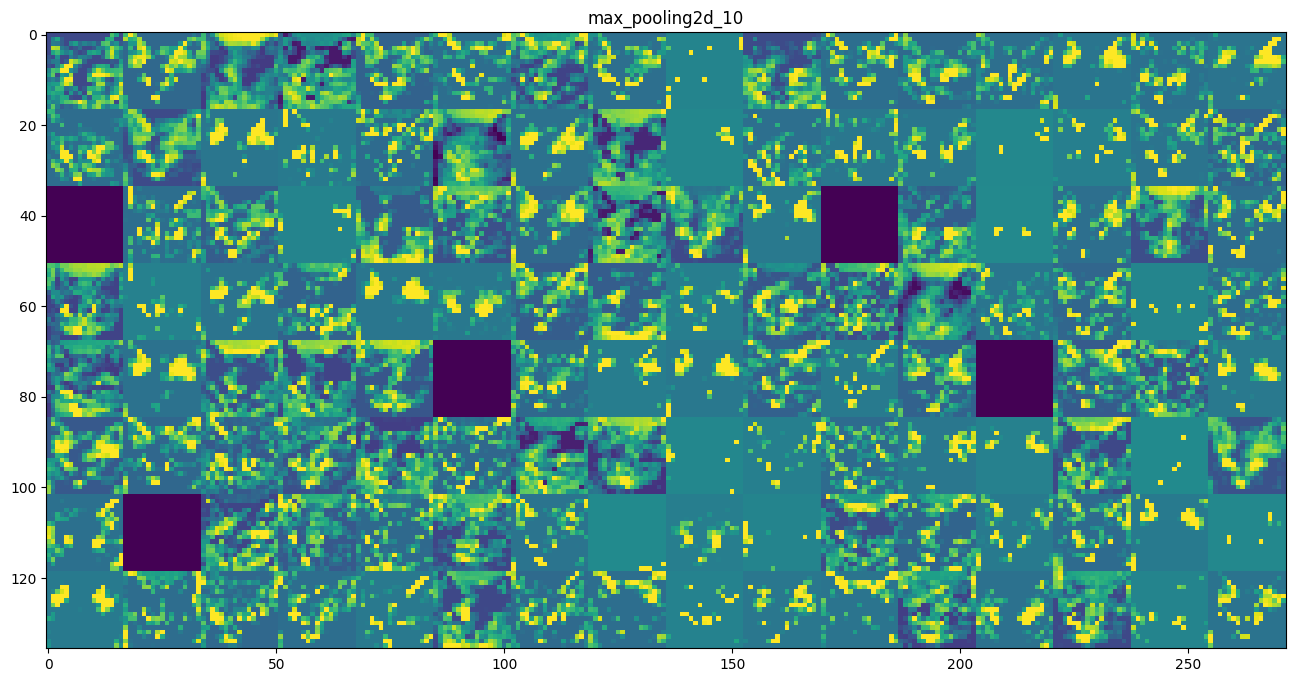

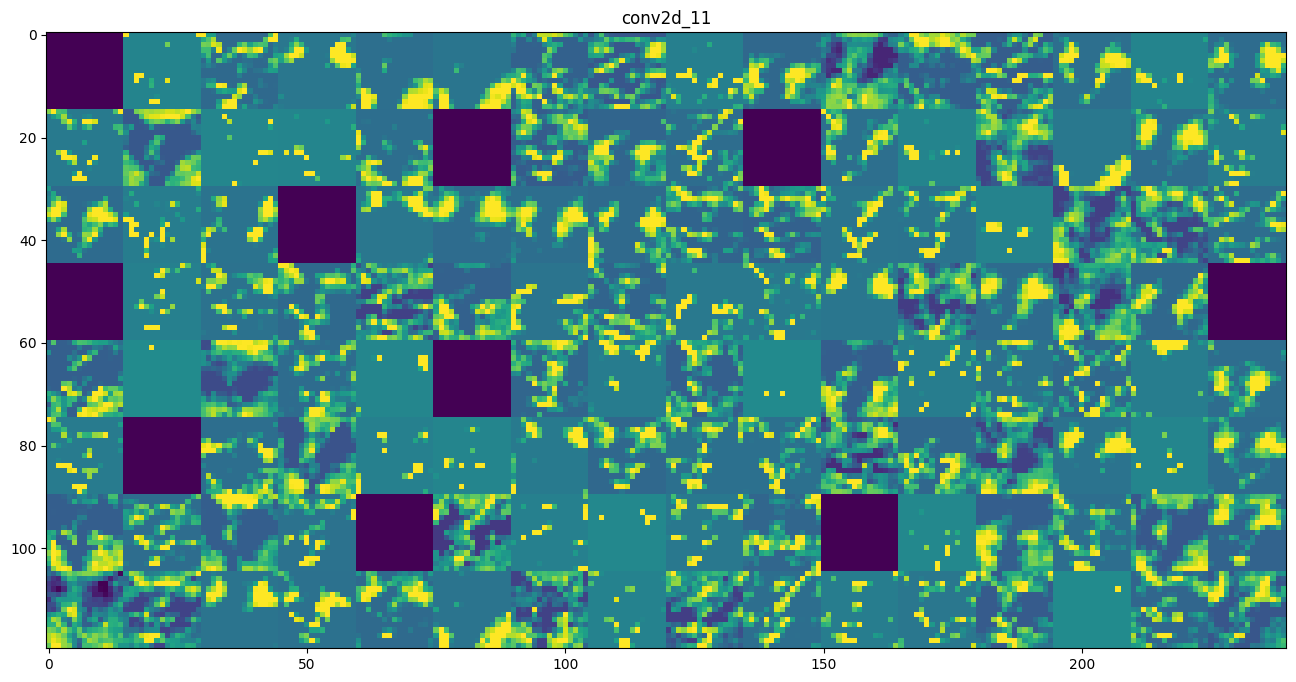

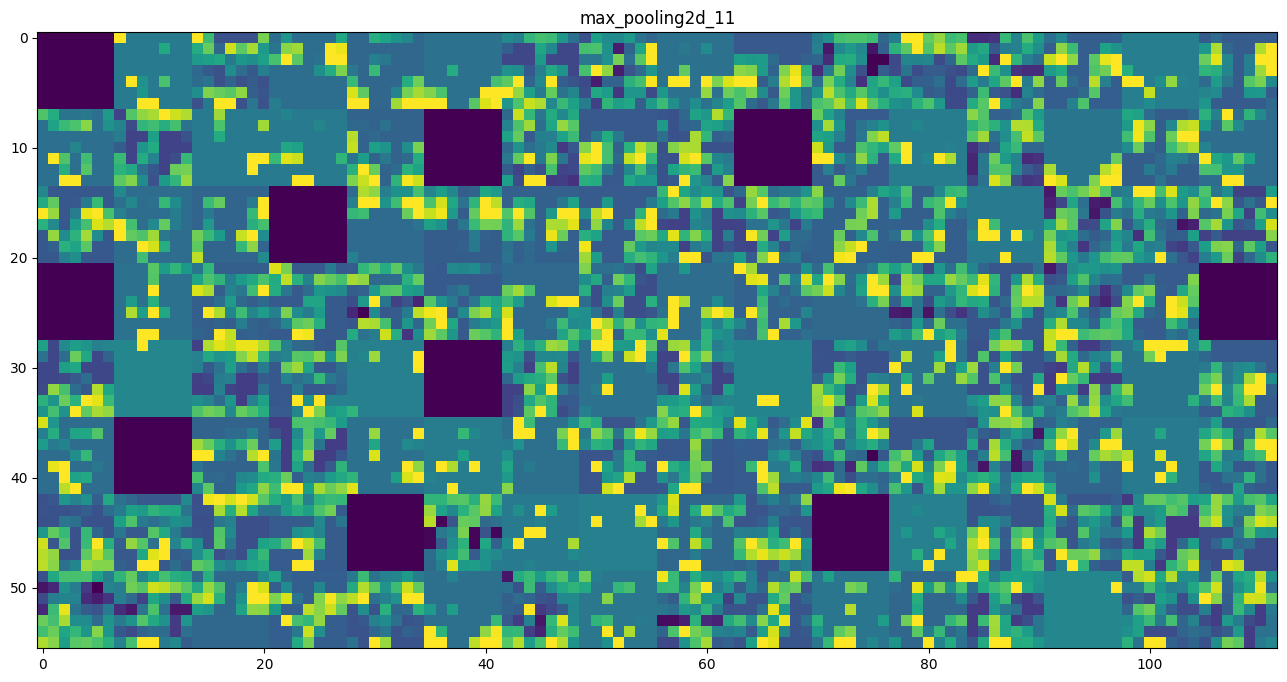

In [30]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]

    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                        row * size : (row + 1) * size] = channel_image
            scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [1]:
from keras.applications import VGG16
from keras import backend as K
model = VGG16(weights='imagenet',
                include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

2024-04-10 11:00:19.329586: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-10 11:00:19.504937: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 11:00:19.505012: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 11:00:19.505035: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-10 11:00:19.581705: I tensorflow/core/platform/cpu_feature_g

In [6]:
import  tensorflow as tf
with tf.GradientTape() as tape:
    # 用于记录损失相对于输入的梯度
    grads = tape.gradient(loss, model.input)

AttributeError: 'KerasTensor' object has no attribute '_id'